# Tuto OpenCV II

Simple car detection program using frame differencing method.

## Installation 

In [ ]:
# Download video u want to process "https://www.pexels.com/video/aerial-view-of-bridge-and-river-2292093/"
!sudo apt install -y python3-opencv
!sudo apt install -y python3-matplotlib

## Start programming

#### Frames extraction from the video

In [15]:
import cv2

![ -d frames ] || mkdir frames

i = 0
cap = cv2.VideoCapture('./res/traffic.mp4')

while True:
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (850, 700))
        cv2.imwrite("./frames/frame_%06d.jpg" % i, frame)
        i += 1
    else:
        print("Extraction finished: %d frames." % i)
        break
    
cap.release()

Extraction finished: 923 frames.


#### Let's make a list containing all grayed-frames

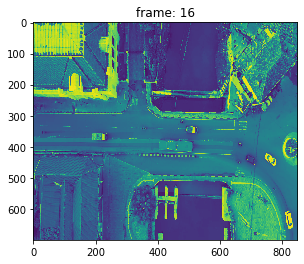

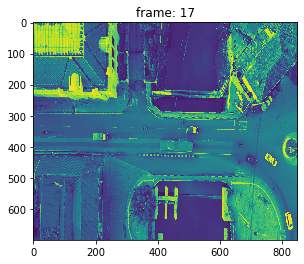

In [16]:
import os
import re
import matplotlib.pyplot as plt

# sort all frames from ./frames/ dir
filenames_lst = os.listdir('./frames/')
filenames_lst.sort(key=lambda f: int(re.sub('\D', '', f)))

# store them within a new list
pictures_lst = []
for i in filenames_lst:
    pictures_lst.append(cv2.imread('./frames/' + i))

i = 16
for f in [i, i+1]:
    plt.imshow(cv2.cvtColor(pictures_lst[f], cv2.COLOR_BGR2GRAY))
    plt.title("frame: "+str(f))
    plt.show()

Let's run a frame differenciation

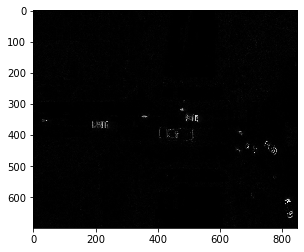

In [17]:
i = 16

grayA = cv2.cvtColor(pictures_lst[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(pictures_lst[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

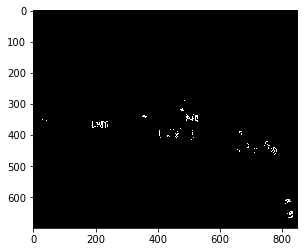

In [18]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 40, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

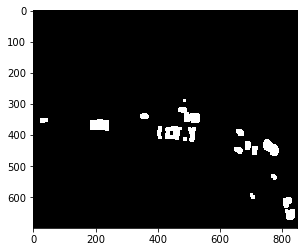

In [19]:
import numpy as np

# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 5)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

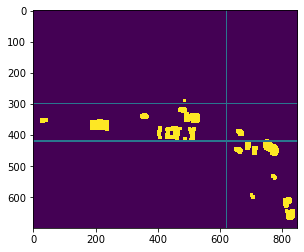

In [21]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 300),(850,300),(100, 0, 0),3)
cv2.line(dilated, (0, 420),(850,420),(100, 0, 0),3)
cv2.line(dilated, (620, 0),(620,700),(100, 0, 0),3)
plt.show()

In [22]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if ((x >= 620) or ((y >= 300) & (y <= 420) & (x <= 620))) & (cv2.contourArea(cntr) >= 45):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

13

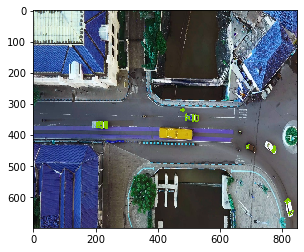

In [23]:
dmy = pictures_lst[16].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
plt.imshow(dmy)
plt.show()

### All in one

In [ ]:
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
![ -d frames_out ] || mkdir frames_out

pathIn = "./frames_out/"

for i in range(len(pictures_lst)-1):
    grayA = cv2.cvtColor(pictures_lst[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(pictures_lst[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if ((x >= 620) or ((y >= 300) & (y <= 420) & (x <= 620))) & (cv2.contourArea(cntr) >= 45):
            valid_cntrs.append(cntr)

    dmy = pictures_lst[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "object detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

pathOut = 'object_detection.mp4'

fps = 20.0

frame_array = []
files = [f for f in os.listdir(pathIn) if os.path.isfile(os.path.join(pathIn, f))]

files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    frame_array.append(img)

out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    out.write(frame_array[i])

out.release()

print("Finished")